<h1>Initial and Exploratory data analysis</h1>

In [1]:
#Importing libraries
import  pandas as pd
import  numpy as np
import  seaborn as sns
import  matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

<h2>Importing and Examine Datasets</h2>

In [2]:
#Load database tables in DataFrames
with sqlite3.connect("./data/database.sqlite") as con:
    countries = pd.read_sql("SELECT * from Country", con)
    matches = pd.read_sql("SELECT * from Match", con)
    leagues = pd.read_sql("SELECT * from League", con)
    teams = pd.read_sql("SELECT * from Team", con)
    teams_stats = pd.read_sql("SELECT * from Team_Attributes", con)
    players = pd.read_sql("SELECT * from Player", con)
    player_stats = pd.read_sql("SELECT * from Player_Attributes", con)

(25979, 115)

In [4]:
list(matches.columns)

['id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player

In [5]:
teams.tail()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,overall,attack,midfield,defence
294,49479,10190,898,FC St. Gallen,GAL,67,67,69,63
295,49837,10191,1715,FC Thun,THU,63,64,62,60
296,50201,9777,324,Servette FC,SER,61,58,60,59
297,50204,7730,1862,FC Lausanne-Sports,LAU,65,66,66,65
298,51606,7896,10032,Lugano,LUG,65,69,64,64


In [6]:
teams.dtypes

id                   int64
team_api_id          int64
team_fifa_api_id     int64
team_long_name      object
team_short_name     object
overall              int64
attack               int64
midfield             int64
defence              int64
dtype: object

In [7]:
#Joining teams with teams_stats

In [8]:
teams=pd.merge(teams,teams_stats,how='inner', on='team_api_id')

In [9]:
teams.dtypes

id_x                                int64
team_api_id                         int64
team_fifa_api_id_x                  int64
team_long_name                     object
team_short_name                    object
overall                             int64
attack                              int64
midfield                            int64
defence                             int64
id_y                                int64
team_fifa_api_id_y                  int64
date                               object
buildUpPlaySpeed                    int64
buildUpPlaySpeedClass              object
buildUpPlayDribbling              float64
buildUpPlayDribblingClass          object
buildUpPlayPassing                  int64
buildUpPlayPassingClass            object
buildUpPlayPositioningClass        object
chanceCreationPassing               int64
chanceCreationPassingClass         object
chanceCreationCrossing              int64
chanceCreationCrossingClass        object
chanceCreationShooting            

In [10]:
#Add new field to Matches year_team
matches['team_year']=np.where(matches.season=='2008/2009',2010,-1)
matches['team_year']=np.where(matches.season=='2009/2010',2010,matches['team_year'])
matches['team_year']=np.where(matches.season=='2010/2011',2010,matches['team_year'])
matches['team_year']=np.where(matches.season=='2011/2012',2011,matches['team_year'])
matches['team_year']=np.where(matches.season=='2012/2013',2012,matches['team_year'])
matches['team_year']=np.where(matches.season=='2013/2014',2013,matches['team_year'])
matches['team_year']=np.where(matches.season=='2014/2015',2014,matches['team_year'])
matches['team_year']=np.where(matches.season=='2015/2016',2015,matches['team_year'])



In [63]:
#Add Team year to team
teams['team_year']=pd.to_datetime(teams.date).dt.year

In [12]:
matches[matches['team_year']==-1]

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,team_year


In [13]:
#Renaming some columns with names too long
teams_home=teams.rename(columns={
                      'overall':'home_overall',
                      'attack':'home_attack',
                      'midfield':'home_midfield',
                      'defence':'home_defence',
                      'team_long_name':'home_team_name',
                      'team_short_name':'home_team_sname', 
                      'buildUpPlaySpeed':'home_bupspeed',
                      'buildUpPlaySpeedClass':'home_bupspeedc',
                      'buildUpPlayDribbling':'home_bupdribb',
                      'buildUpPlayDribblingClass':'home_bupdribbc',
                      'buildUpPlayPassing':'home_buppass',
                      'buildUpPlayPassingClass':'home_buppassc',
                      'buildUpPlayPositioningClass':'home_bupposic',
                      'chanceCreationPassing':'home_ccpass',
                      'chanceCreationPassingClass':'home_ccpassc',
                      'chanceCreationCrossing':'home_cccross',
                      'chanceCreationCrossingClass':'home_cccrossc',
                      'chanceCreationShooting':'home_ccshoot',
                      'chanceCreationShootingClass':'home_ccshootc',
                      'chanceCreationPositioningClass':'home_ccposic',
                      'defencePressure':'home_defpress',
                      'defencePressureClass':'home_defpressc',
                      'defenceAggression':'home_defaggre',
                      'defenceAggressionClass':'home_defaggrec',
                      'defenceTeamWidth':'home_defwidth',
                      'defenceTeamWidthClass':'home_defwidthc',
                      'defenceDefenderLineClass':'home_deflinec'                     
                     },inplace=False)

#Renaming some columns with names too long
teams_away=teams.rename(columns={
                      'overall':'away_overall',
                      'attack':'away_attack',
                      'midfield':'away_midfield',
                      'defence':'away_defence',
                      'team_long_name':'away_team_name',
                      'team_short_name':'away_team_sname', 
                      'buildUpPlaySpeed':'away_bupspeed',
                      'buildUpPlaySpeedClass':'away_bupspeedc',
                      'buildUpPlayDribbling':'away_bupdribb',
                      'buildUpPlayDribblingClass':'away_bupdribbc',
                      'buildUpPlayPassing':'away_buppass',
                      'buildUpPlayPassingClass':'away_buppassc',
                      'buildUpPlayPositioningClass':'away_bupposic',
                      'chanceCreationPassing':'away_ccpass',
                      'chanceCreationPassingClass':'away_ccpassc',
                      'chanceCreationCrossing':'away_cccross',
                      'chanceCreationCrossingClass':'away_cccrossc',
                      'chanceCreationShooting':'away_ccshoot',
                      'chanceCreationShootingClass':'away_ccshootc',
                      'chanceCreationPositioningClass':'away_ccposic',
                      'defencePressure':'away_defpress',
                      'defencePressureClass':'away_defpressc',
                      'defenceAggression':'away_defaggre',
                      'defenceAggressionClass':'away_defaggrec',
                      'defenceTeamWidth':'away_defwidth',
                      'defenceTeamWidthClass':'away_defwidthc',
                      'defenceDefenderLineClass':'away_deflinec'                     
                     },inplace=False)

In [14]:
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,team_year
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,2010
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,2010
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,2010
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,2010
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,2010


In [15]:
#Joining Matches with Teams
matches=pd.merge(matches,teams_home,how='inner',left_on=['home_team_api_id','team_year'],right_on=['team_api_id','team_year'])

In [16]:
list(matches.columns)

['id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date_x',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_play

In [17]:
matches=pd.merge(matches,teams_away,how='inner',left_on=['away_team_api_id','team_year'],right_on=['team_api_id','team_year'])

In [18]:
matches.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date_x',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'away_ccshoot', 'away_ccshootc', 'away_ccposic', 'away_defpress',
       'away_defpressc', 'away_defaggre', 'away_defaggrec', 'away_defwidth',
       'away_defwidthc', 'away_deflinec'],
      dtype='object', length=182)

In [19]:
list(matches.columns)

['id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date_x',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_play

In [20]:
#removing columns from matches
matches.drop('date_x',axis=1,inplace=True)
matches.drop('id_x_y',axis=1,inplace=True)
matches.drop('id_y_y',axis=1,inplace=True)
matches.drop('team_fifa_api_id_x_y',axis=1,inplace=True)
matches.drop('team_fifa_api_id_y_y',axis=1,inplace=True)



['id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player_Y11',
 '

In [21]:
matches['overall']=matches['home_overall']-matches['away_overall']

In [22]:
matches['hatt_vs_adef']=matches['home_attack']-matches['away_defence']
matches['hdef_vs_aatt']=matches['home_defence']-matches['away_attack']
matches['hmid_vs_amid']=matches['home_midfield']-matches['away_midfield']

<h2>Create a new win column: 0-home team won 1-visitor team won 2-Tie</h2>

In [23]:
matches['win']=np.where((matches['home_team_goal'] - matches['away_team_goal'])>0,0,-1)
matches['win']=np.where((matches['home_team_goal'] - matches['away_team_goal'])<0,1,matches['win'])
matches['win']=np.where((matches['home_team_goal'] - matches['away_team_goal'])==0,2,matches['win'])
matches['win'].head()

0    2
1    2
2    0
3    2
4    0
Name: win, dtype: int64

In [24]:
matches['win'].value_counts()
matches[matches['win']==0].win.count()

10850

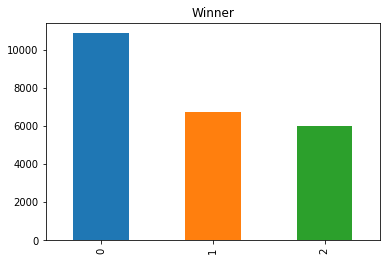

In [25]:
# Plot the win data
matches.win.value_counts().plot(kind='bar',title='Winner');

 The home winning it's clearly the option most probable, second visitor winning (arround 17% less probable), and finally the less probable option is the tie.

In [26]:
print("Percentage Home Wins: {0:.2%}".format(matches[matches['win']==0].win.count()/matches['win'].value_counts().sum()))
print("Percentage Visitor Wins: {0:.2%}".format(matches[matches['win']==1].win.count()/matches['win'].value_counts().sum()))
print("Percentage Tie: {0:.2%}".format(matches[matches['win']==2].win.count()/matches['win'].value_counts().sum()))

Percentage Home Wins: 46.02%
Percentage Visitor Wins: 28.64%
Percentage Tie: 25.34%


<h2>Create columns difference of Tactics</h2>

In [27]:
matches['bupspeed']=matches['home_bupspeed']-matches['away_bupspeed']
matches['bupdribb']=matches['home_bupdribb']-matches['away_bupdribb']
matches['buppass']=matches['home_buppass']-matches['away_buppass']
matches['ccpass']=matches['home_ccpass']-matches['away_ccpass']
matches['cccross']=matches['home_cccross']-matches['away_cccross']
matches['ccshoot']=matches['home_ccshoot']-matches['away_ccshoot']
matches['defpress']=matches['home_defpress']-matches['away_defpress']
matches['defaggre']=matches['home_defaggre']-matches['away_defaggre']
matches['defwidth']=matches['home_defwidth']-matches['away_defwidth']


<h2>Visualization and Statistics</h2>

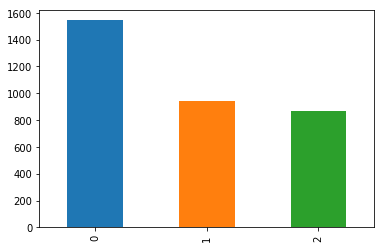

In [28]:
matches[matches['bupspeed']==0].win.value_counts().plot(kind='bar');

<h2>Goals</h2>

In [29]:
list(matches.columns.values)

['id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player_Y11',
 '

In [30]:
team_home_goals=pd.DataFrame(matches.groupby(['home_team_api_id'])['home_team_goal'].mean())
team_home_goals.rename(columns={'home_team_goal':'home_team_mean'},inplace=True)                          
team_home_goals.index.name='team_api_id'
team_home_goals.head()

,home_team_mean
team_api_id,
1601,1.209524
1773,1.538462
1957,1.514286
2033,0.910448
2182,1.742857


In [31]:
team_home_rec=pd.DataFrame(matches.groupby(['home_team_api_id'])['away_team_goal'].mean())
team_home_rec.rename(columns={'away_team_goal':'home_rec_mean'},inplace=True)                          
team_home_rec.index.name='team_api_id'
team_home_goals=team_home_goals.join(team_home_rec,how='inner')
team_home_goals['home_effec']=team_home_goals['home_team_mean']-team_home_goals['home_rec_mean']
team_home_goals.head()

,home_team_mean,home_rec_mean,home_effec
team_api_id,,,
1601,1.209524,1.009524,0.200000
1773,1.538462,1.923077,-0.384615
1957,1.514286,0.990476,0.523810
2033,0.910448,1.283582,-0.373134
2182,1.742857,0.780952,0.961905


In [32]:
team_away_goals=pd.DataFrame(matches.groupby(['away_team_api_id'])['away_team_goal'].mean())
team_away_goals.index.name='team_api_id'
team_away_goals.rename(columns={'away_team_goal':'away_team_mean'},inplace=True)
team_away_goals.head()

,away_team_mean
team_api_id,
1601,1.085714
1773,1.230769
1957,0.904762
2033,0.910448
2182,1.219048


In [33]:
team_away_rec=pd.DataFrame(matches.groupby(['home_team_api_id'])['home_team_goal'].mean())
team_away_rec.rename(columns={'home_team_goal':'away_rec_mean'},inplace=True)                          
team_away_rec.index.name='team_api_id'
team_away_goals=team_away_goals.join(team_away_rec,how='inner')
team_away_goals['away_effec']=team_away_goals['away_team_mean']-team_away_goals['away_rec_mean']
team_away_goals.head()

,away_team_mean,away_rec_mean,away_effec
team_api_id,,,
1601,1.085714,1.209524,-0.123810
1773,1.230769,1.538462,-0.307692
1957,0.904762,1.514286,-0.609524
2033,0.910448,0.910448,0.000000
2182,1.219048,1.742857,-0.523810


In [34]:
#team_goals=team_home_goals.join(team_away_goals,how='inner')
#team_goals=team_goals.join(team_home_rec,how='inner')
#team_goals=team_goals.join(team_away_rec,how='inner')
#team_goals['home_team_effec']=team_goals['home_team_mean']-team_goals['home_rec_mean']
#team_goals['away_team_effec']=team_goals['away_team_mean']-team_goals['away_rec_mean']
#team_goals.head()

In [35]:
#team_goals['team_mean']=(team_goals['home_team_mean']+team_goals['away_team_mean'])/2

In [36]:
#team_goals

In [37]:
matches=pd.merge(matches,team_home_goals,left_on='home_team_api_id',right_index=True)

In [38]:
matches=pd.merge(matches,team_away_goals,left_on='away_team_api_id',right_index=True)
list(matches.columns)

['id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player_Y11',
 '

In [39]:
#matches.hist(figsize=(20,8));

In [45]:
teams_home.overall.plot(kind='hist',bins=20);

AttributeError: 'DataFrame' object has no attribute 'overall'

In [ ]:
#sns.pairplot(matches,hue='win',vars=['home_bupspeed','away_bupspeed','home_buppass','away_buppass','home_ccpass','away_ccpass','home_ccshoot','away_ccshoot']);
#list(teams_home.columns)

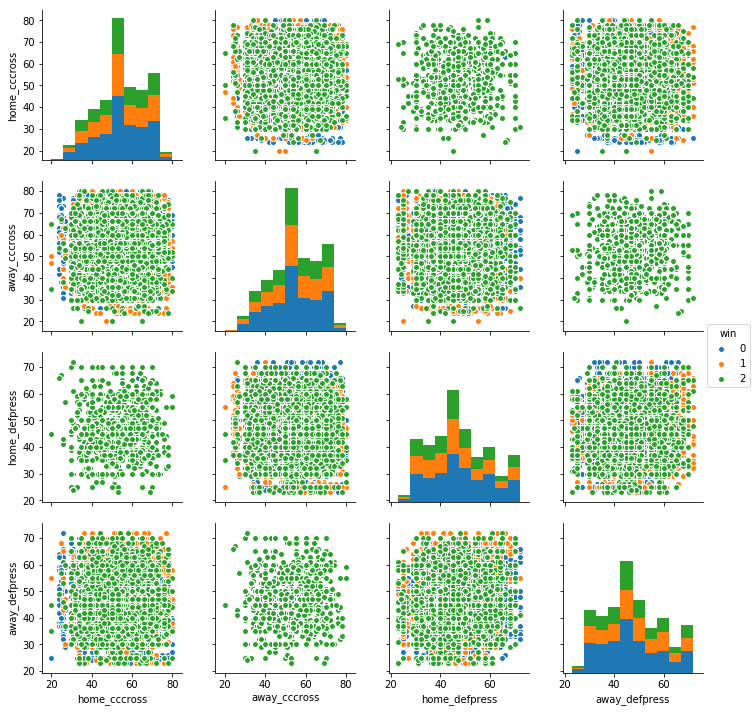

In [46]:
sns.pairplot(matches,hue='win',vars=['home_cccross','away_cccross','home_defpress','away_defpress']);
#list(teams_home.columns)

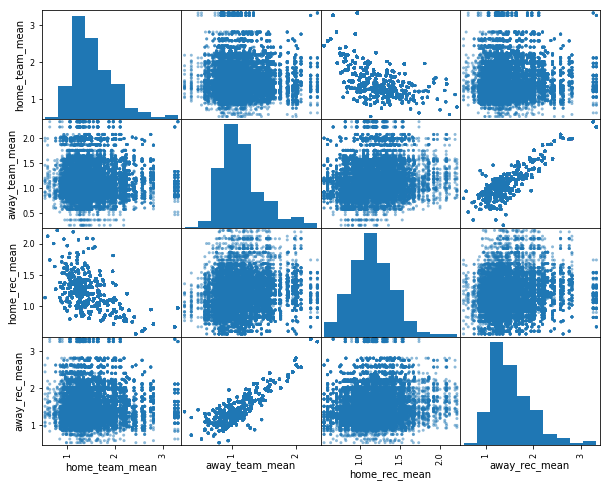

In [42]:
from pandas.plotting import scatter_matrix
scatter_matrix(matches[['home_team_mean','away_team_mean','home_rec_mean','away_rec_mean']],figsize=(10,8));

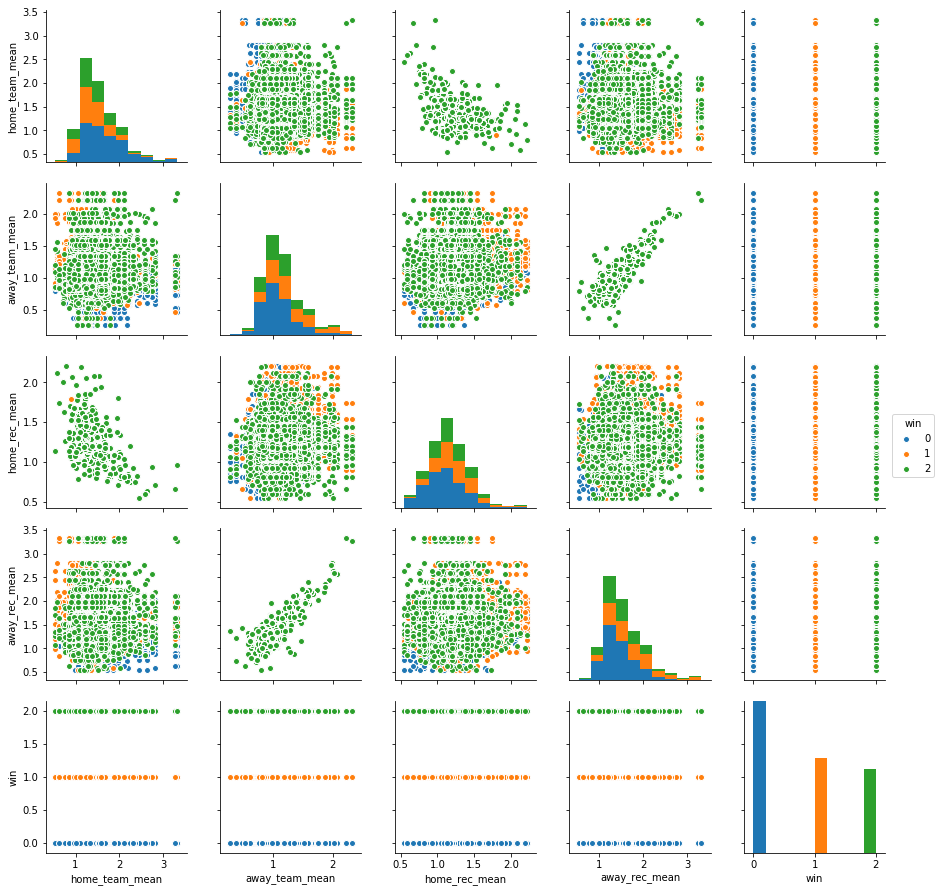

In [62]:
sns.pairplot(matches,vars=['home_team_mean','away_team_mean','home_rec_mean','away_rec_mean','win'],hue="win")

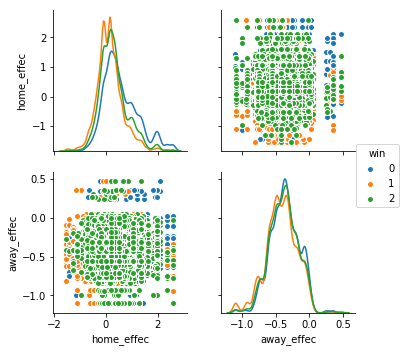

In [51]:
sns.pairplot(matches,vars=['home_effec','away_effec'],hue="win",diag_kind="kde")

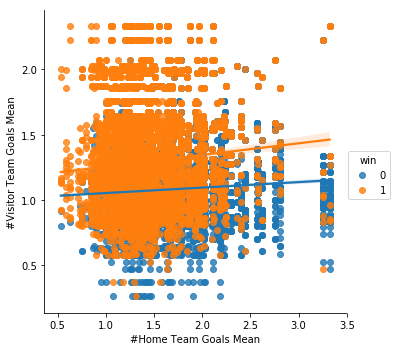

In [55]:
g=sns.lmplot(x="home_team_mean",y="away_team_mean",hue="win",truncate=True,size=5,data=matches[matches['win']!=2])
# Use more informative axis labels than are provided by default
g.set_axis_labels("#Home Team Goals Mean", "#Visitor Team Goals Mean")

In [5]:
matches.plot(kind='scatter',title='Goals Mean by Team', 
          x='home_team_mean',
          y='away_team_mean',  
          c='win', 
          colormap='brg',figsize=(15,10));

NameError: name 'matches' is not defined

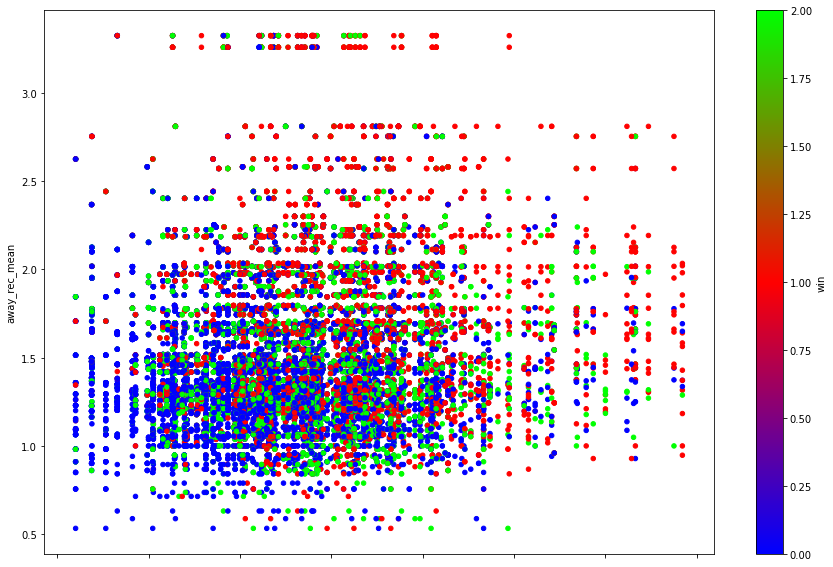

In [756]:
matches.plot(kind='scatter', 
          x='home_rec_mean',
          y='away_rec_mean',  
          c='win', 
          colormap='brg',figsize=(15,10));

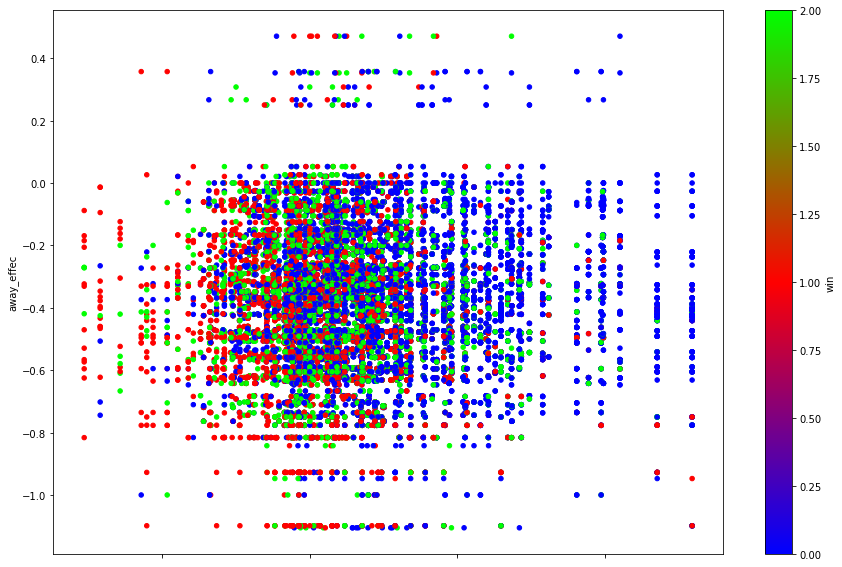

In [757]:
matches.plot(kind='scatter', 
          x='home_effec',
          y='away_effec',  
          c='win', 
          colormap='brg',figsize=(15,10));

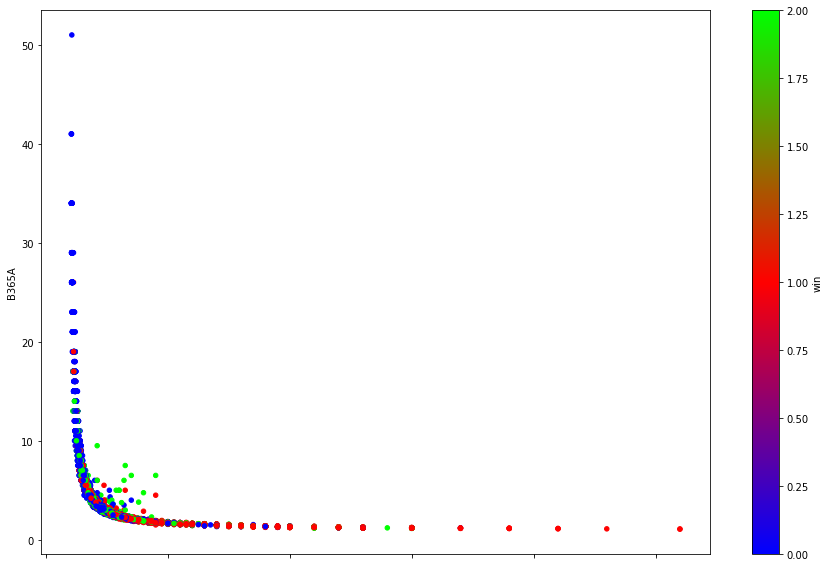

In [766]:
#Betting houses
matches.plot(kind='scatter', 
          x='B365H',
          y='B365A',  
          c='win', 
          colormap='brg',figsize=(15,10));

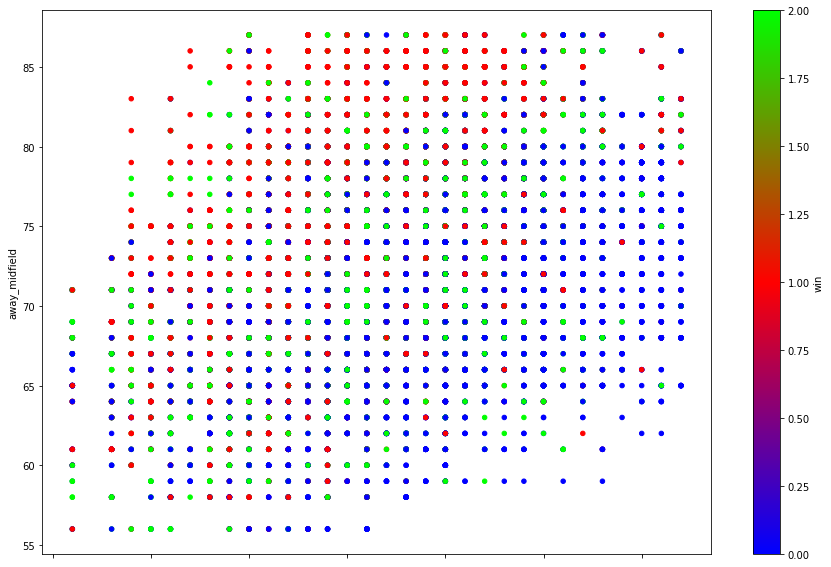

In [762]:
matches.plot(kind='scatter', 
          x='home_midfield',
          y='away_midfield',  
          c='win', 
          colormap='brg',figsize=(15,10));

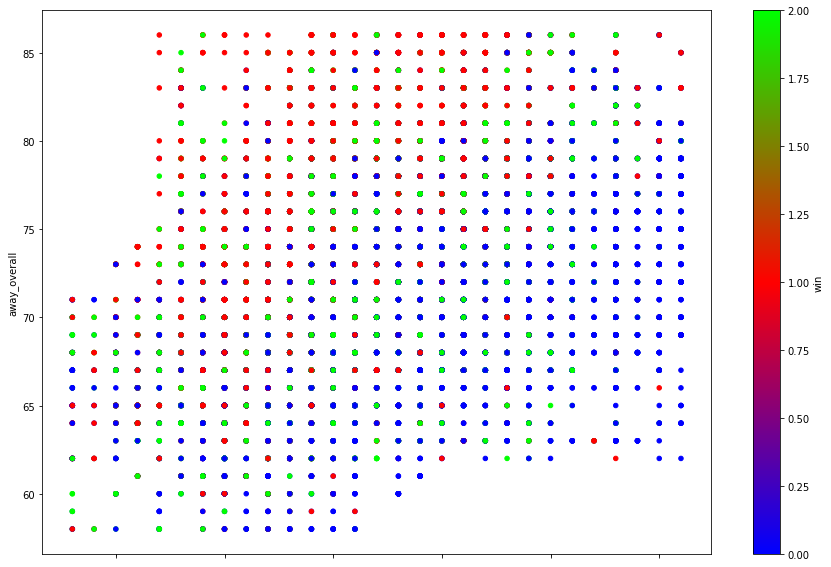

In [763]:
matches.plot(kind='scatter', 
          x='home_overall',
          y='away_overall',  
          c='win', 
          colormap='brg',figsize=(15,10));

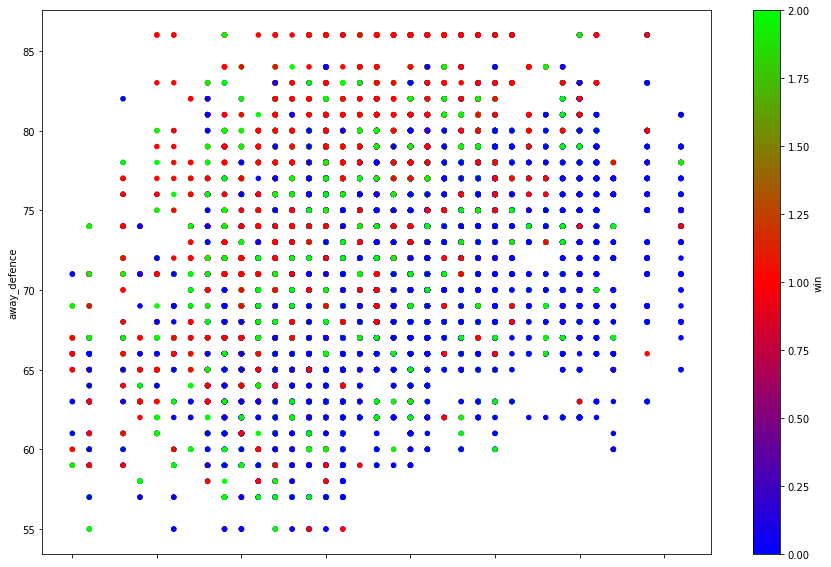

In [764]:
matches.plot(kind='scatter', 
          x='home_attack',
          y='away_defence',  
          c='win', 
          colormap='brg',figsize=(15,10));

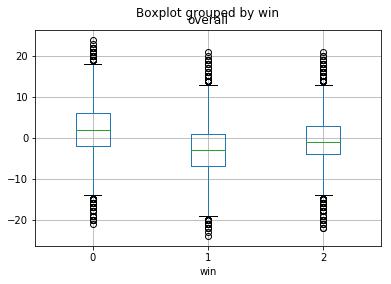

In [780]:
matches.boxplot(column='overall',by='win');

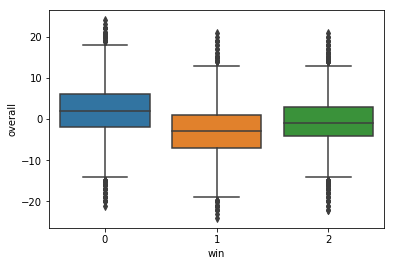

In [56]:
sns.boxplot(x="win",y="overall",data=matches);

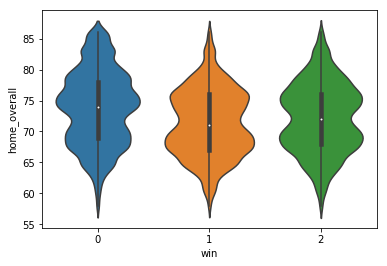

In [61]:
sns.violinplot(y="home_overall",x="win",data=matches);

In [ ]:
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5);

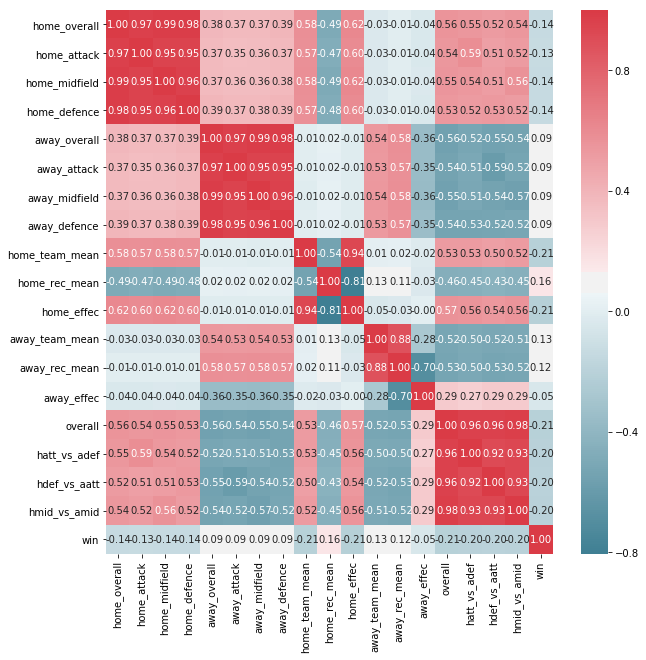

In [1132]:
matches_clean=matches.iloc[:,[120,121,122,123,151,152,153,154,187,188,189,190,191,192,193,194,195,196,177]]
matches_correlations = matches_clean.corr();
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(matches_correlations, cmap=cmap, annot=True, fmt='.2f')
plt.gcf().set_size_inches(10, 10);

In [1116]:
#Logistic Regression
matches_notie=matches
#matches_notie=matches[matches['win']!=2]
#X=matches_notie.iloc[:,[120,121,122,123,151,152,153,154,187,188,190,191]]
X=matches_notie.iloc[:,[189,193,194,195,196]]
#X=matches_notie.iloc[:,[189,192]]
X.head()

,home_effec,overall,hatt_vs_adef,hdef_vs_aatt,hmid_vs_amid
0,0.73913,7,11,7,7
1,0.73913,7,11,7,7
2,0.73913,7,11,7,7
574,0.73913,7,11,7,7
840,0.73913,7,11,7,7


In [1117]:
y=matches_notie.iloc[:,[177]]
y.head()

,win
0,2
1,2
2,0
574,0
840,0


In [1118]:
#Splitting the dataset into the Training set and the Test set
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [1119]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
x_test=sc_X.transform(X_test)

In [1120]:
#Fitting Logistic Reegresion to the Training set
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

/home/dimperatori/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1121]:
#Predicting the Test set results
y_pred= classifier.predict(X_test)

In [1122]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [1123]:
cm

array([[1509,  668,    0],
       [ 544,  809,    0],
       [ 600,  585,    0]])

In [1124]:
(cm[0][0]+cm[1][1])/(cm[0][1]+cm[1][0]+cm[0][0]+cm[1][1])*100

65.6657223796034

In [1125]:
print((metrics.accuracy_score(y_test, y_pred)))

0.4916224814422057


In [1126]:
#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=15,metric='minkowski',p=2)

In [1127]:
classifier.fit(X_train,y_train)

/home/dimperatori/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [1128]:
y_pred=classifier.predict(X_test)

In [1129]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm=confusion_matrix(y_test,y_pred)

In [1130]:
cm

array([[1512,  630,   35],
       [ 582,  749,   22],
       [ 618,  547,   20]])

In [1131]:
print((metrics.accuracy_score(y_test, y_pred)))

0.48377518557794275
